# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [41]:
## **Movie Data Analysis Term Project DSA210**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy import stats
from itertools import combinations

In [ ]:
### **Data Process**

In [7]:
def load_and_merge(movies_path: str, credits_path: str) -> pd.DataFrame:
    movies = pd.read_csv(movies_path)
    credits = pd.read_csv(credits_path)
    df = pd.merge(movies, credits, left_on='id', right_on='movie_id', how='inner')
    return df

In [8]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    """Convert release_date to datetime, extract year, and engineer genre features."""
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['year'] = df['release_date'].dt.year

    df['genre_list'] = df['genres'].apply(
        lambda x: [d['name'] for d in ast.literal_eval(x)]
    )
    df['primary_genre'] = df['genre_list'].apply(lambda lst: lst[0] if lst else None)
    df['genre_count'] = df['genre_list'].apply(len)

    df['runtime_bucket'] = pd.cut(
        df['runtime'],
        bins=[0, 90, 120, 150, np.inf],
        labels=['<=90', '91-120', '121-150', '150+']
    )
    return df


In [43]:
# Load and merge datasets
MOVIES_CSV  = 'tmdb_5000_movies.csv'
CREDITS_CSV = 'tmdb_5000_credits.csv'
df = load_and_merge(MOVIES_CSV, CREDITS_CSV)
df.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,

In [44]:
# Preprocess dataframe
df = preprocess(df)
df.head(10) ## Inside of the head() is arbitrary 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,movie_id,title_y,cast,crew,year,genre_list,primary_genre,genre_count,runtime_bucket
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009.0,"[Action, Adventure, Fantasy, Science Fiction]",Action,4,150+
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007.0,"[Adventure, Fantasy, Action]",Adventure,3,150+
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015.0,"[Action, Adventure, Crime]",Action,3,121-150
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012.0,"[Action, Crime, Drama, Thriller]",Action,4,150+
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012.0,"[Action, Adventure, Science Fiction]",Action,3,121-150
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,3576,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",2007.0,"[Fantasy, Action, Adventure]",Fantasy,3,121-150
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,3330,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",2010.0,"[Animation, Family]",Animation,2,91-120
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name

In [ ]:
## **Descriptive Statistics**

In [11]:
# Descriptive statistics for key numeric variables
numeric = ['budget', 'revenue', 'popularity', 'vote_count', 'vote_average', 'runtime', 'genre_count']
df[numeric].describe() 

,budget,revenue,popularity,vote_count,vote_average,runtime,genre_count
count,4.803000e+03,4.803000e+03,4803.000000,4803.000000,4803.000000,4801.000000,4803.000000
mean,2.904504e+07,8.226064e+07,21.492301,690.217989,6.092172,106.875859,2.531751
std,4.072239e+07,1.628571e+08,31.816650,1234.585891,1.194612,22.611935,1.120955
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.900000e+05,0.000000e+00,4.668070,54.000000,5.600000,94.000000,2.000000
50%,1.500000e+07,1.917000e+07,12.921594,235.000000,6.200000,103.000000,2.000000
75%,4.000000e+07,9.291719e+07,28.313505,737.000000,6.800000,118.000000,3.000000
max,3.800000e+08,2.787965e+09,875.581305,13752.000000,10.000000,338.000000,7.000000


In [ ]:
## **Categorical Distribution** 

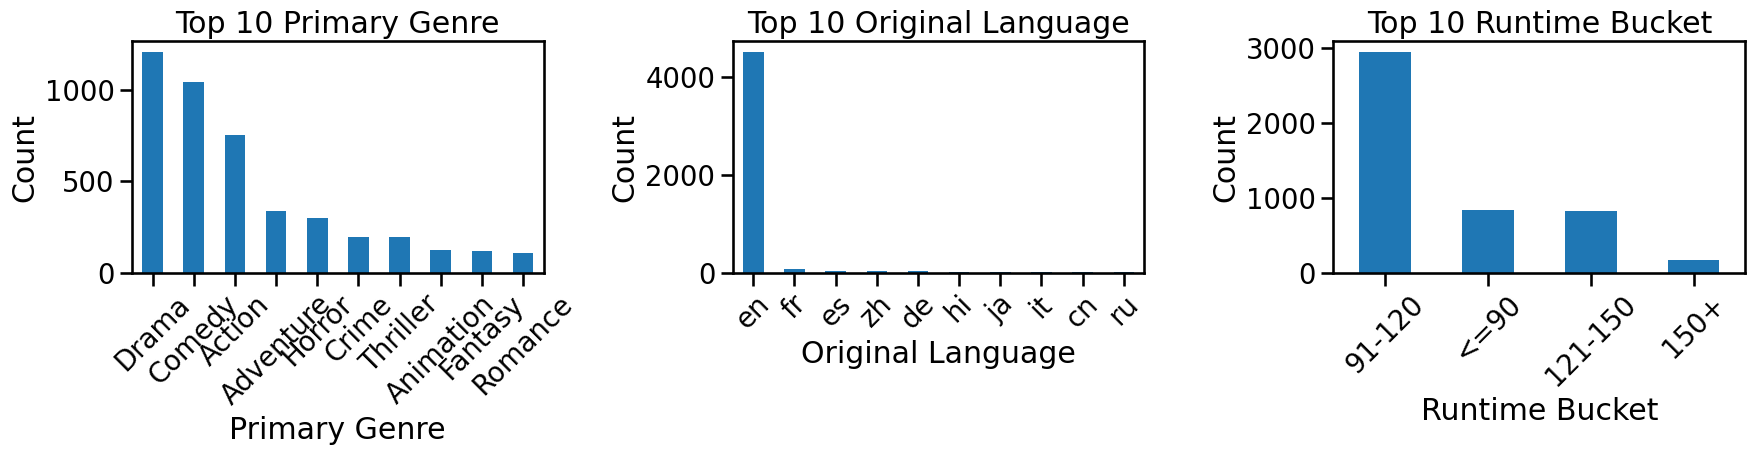

In [42]:
cats = ['primary_genre', 'original_language', 'runtime_bucket']
fig, axes = plt.subplots(1, len(cats), figsize=(18, 5))
for ax, var in zip(axes, cats):
    counts = df[var].value_counts().nlargest(10)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Top 10 {var.replace("_"," ").title()}')
    ax.set_xlabel(var.replace("_"," ").title())
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
##  **Boxplots**

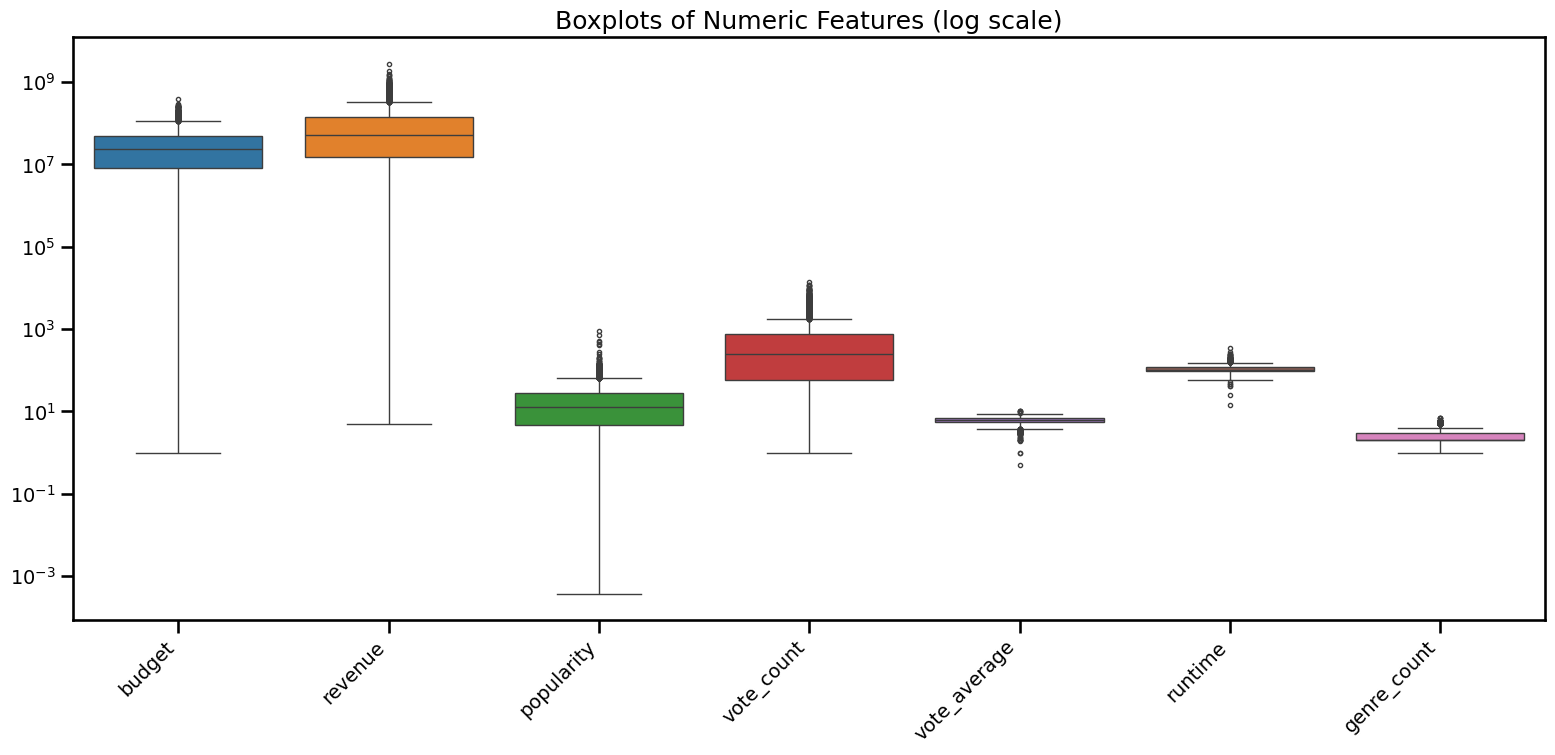

In [31]:
sns.set_context("talk", font_scale=1.2)

plt.figure(figsize=(16, 8))
df2 = df[numeric].replace(0, np.nan)
sns.boxplot(data=df2, fliersize=3)

plt.yscale('log')

plt.title("Boxplots of Numeric Features (log scale)", fontsize=18)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
 ## **Histograms**

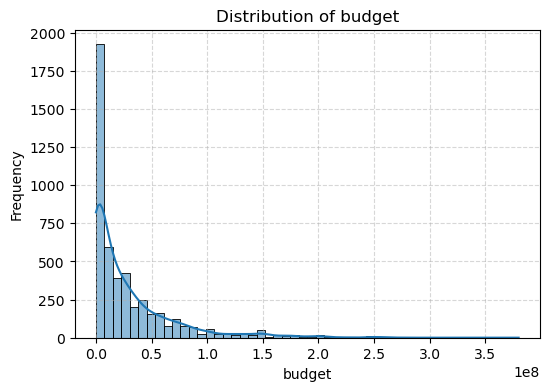

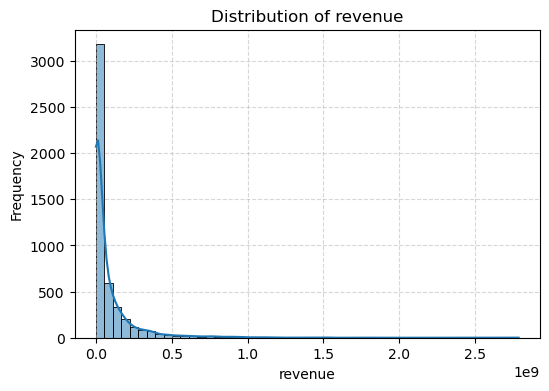

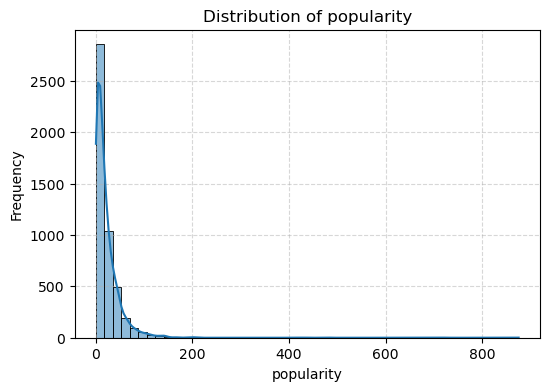

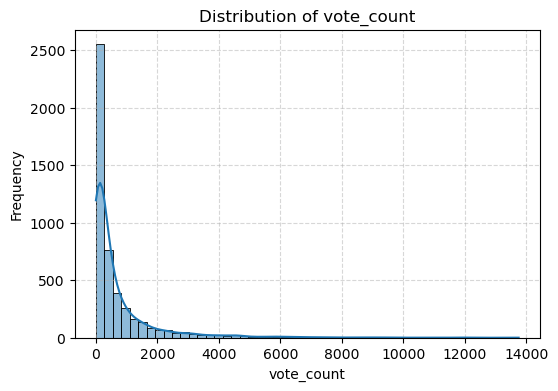

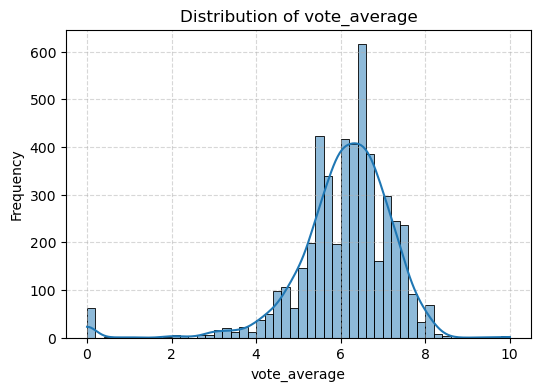

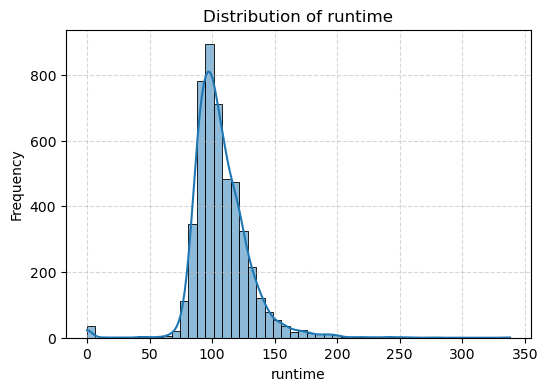

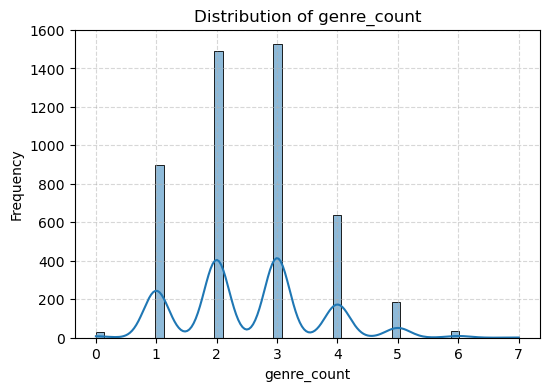

In [15]:
for col in numeric:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(),bins=50,kde=True,stat="count")
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

In [ ]:
## **Bar Chart**

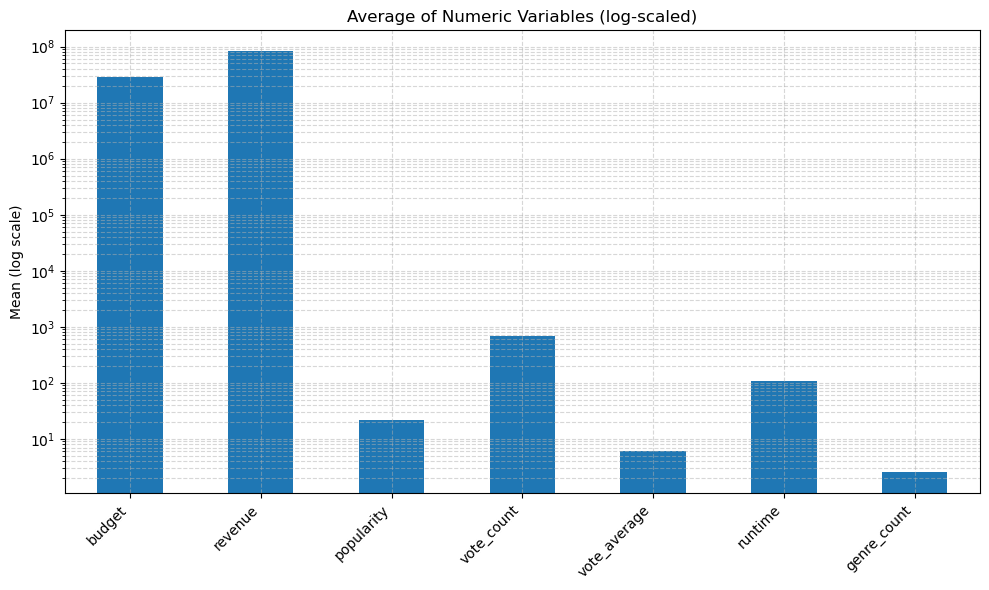

In [17]:
means = df[numeric].mean()

plt.figure(figsize=(10,6))
means.plot(kind='bar')
plt.yscale('log')
plt.ylabel('Mean (log scale)')
plt.title('Average of Numeric Variables (log-scaled)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5, which='both')
plt.tight_layout()
plt.show()



In [ ]:
## **Scatterplots** (numeric variables vs revenue)

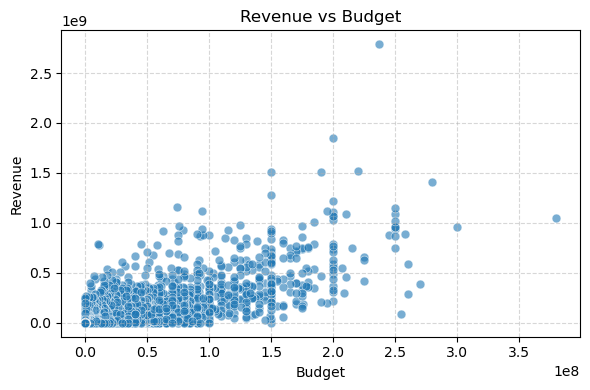

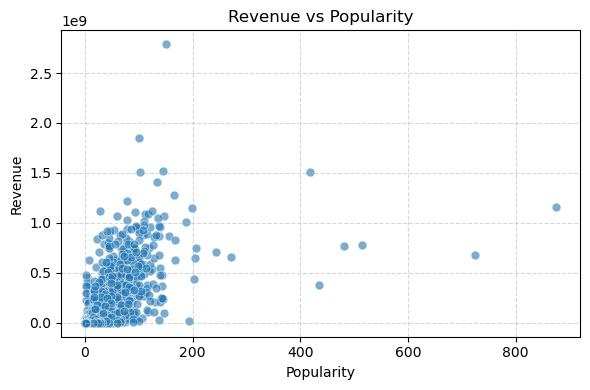

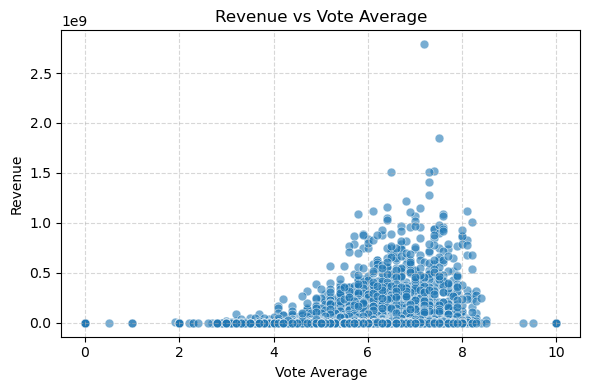

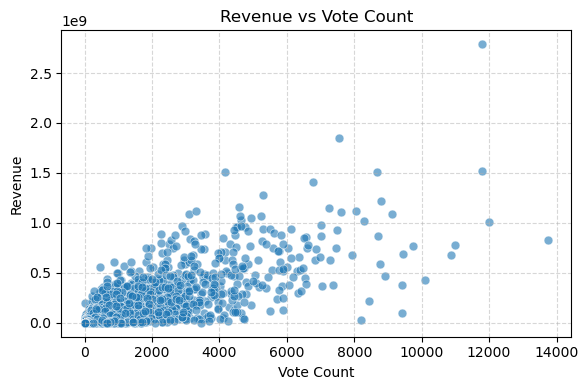

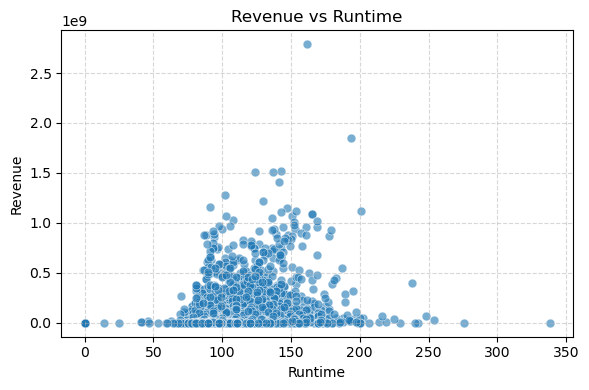

In [22]:
pairs = [
    ('budget',       'revenue'),
    ('popularity',   'revenue'),
    ('vote_average', 'revenue'),
    ('vote_count', 'revenue'),
    ('runtime', 'revenue'),
]

for x_var, y_var in pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        data=df,
        x=x_var,
        y=y_var,
        alpha=0.6,    
        s=40          
    )
    plt.title(f'{y_var.replace("_"," ").title()} vs {x_var.replace("_"," ").title()}')
    plt.xlabel(x_var.replace("_"," ").title())
    plt.ylabel(y_var.replace("_"," ").title())
    plt.grid(linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
## **Correlation Heatmap**


=== Correlation Matrix ===
                budget   revenue  popularity  vote_count  vote_average  \
budget        1.000000  0.730823    0.505414    0.593180      0.093146   
revenue       0.730823  1.000000    0.644724    0.781487      0.197150   
popularity    0.505414  0.644724    1.000000    0.778130      0.273952   
vote_count    0.593180  0.781487    0.778130    1.000000      0.312997   
vote_average  0.093146  0.197150    0.273952    0.312997      1.000000   
runtime       0.269851  0.251093    0.225502    0.271944      0.375046   
genre_count   0.269170  0.182185    0.154918    0.154000      0.085577   

               runtime  genre_count  
budget        0.269851     0.269170  
revenue       0.251093     0.182185  
popularity    0.225502     0.154918  
vote_count    0.271944     0.154000  
vote_average  0.375046     0.085577  
runtime       1.000000     0.098290  
genre_count   0.098290     1.000000  


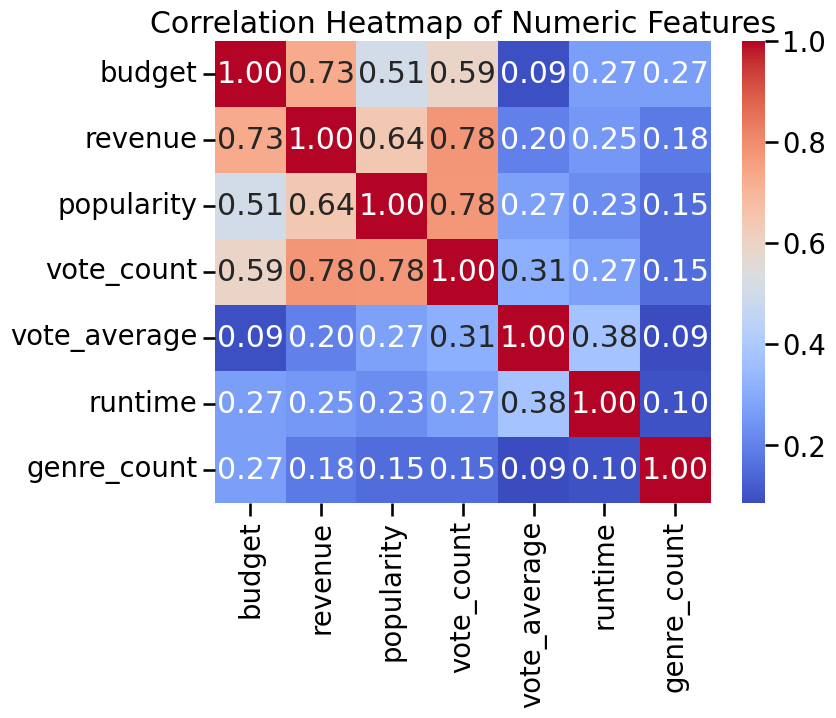

In [32]:
corr = df[numeric].corr()
print("\n=== Correlation Matrix ===")
print(corr)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
## **Pearson Correlation**

In [39]:
def print_vs_revenue_pearson(df: pd.DataFrame, cols: list, target: str = 'revenue'):
    print(f"\n=== Pearson Correlation of Each Feature vs {target.title()} ===")
    for col in cols:
        if col == target:
            continue

        x = df[col]
        y = df[target]
        mask = x.notna() & y.notna()
        if mask.sum() < 2:
        
            continue

        r, p = stats.pearsonr(x[mask], y[mask])
        print(f"{col:12s} vs {target:12s} : r = {r:6.3f}, p = {p:.2e}")

In [40]:
print_vs_revenue_pearson(df, numeric)


=== Pearson Correlation of Each Feature vs Revenue ===
budget       vs revenue      : r =  0.731, p = 0.00e+00
popularity   vs revenue      : r =  0.645, p = 0.00e+00
vote_count   vs revenue      : r =  0.781, p = 0.00e+00
vote_average vs revenue      : r =  0.197, p = 2.72e-43
runtime      vs revenue      : r =  0.251, p = 6.25e-70
genre_count  vs revenue      : r =  0.182, p = 4.05e-37


In [ ]:
## r values shows the correlation between variables and revenue_

In [ ]:
## **Hypothesis Tests **

In [37]:
def hypothesis_tests(df: pd.DataFrame):
    clean = df[['budget', 'revenue']].dropna()
    r, p = stats.pearsonr(clean['budget'], clean['revenue'])
    print("\n--- Hypothesis Test 1: Budget vs Revenue ---")
    print("H0: ρ = 0 (no correlation)\nHa: ρ ≠ 0 (non-zero correlation)")
    print(f"Pearson r = {r:.3f}, p-value = {p:.3e}")
    print("→", "Reject H0" if p < 0.05 else "Fail to reject H0")

    median_rating = df['vote_average'].median()
    grp_high = df[df['vote_average'] > median_rating]['revenue'].dropna()
    grp_low  = df[df['vote_average'] <= median_rating]['revenue'].dropna()
    t_stat, p_val = stats.ttest_ind(grp_high, grp_low, equal_var=False)
    print("\n--- Hypothesis Test 2: High vs Low Rating Revenue ---")
    print("H0: μ_high = μ_low\nHa: μ_high ≠ μ_low")
    print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.3e}")
    print("→", "Reject H0" if p_val < 0.05 else "Fail to reject H0")

In [38]:
hypothesis_tests(df)


--- Hypothesis Test 1: Budget vs Revenue ---
H0: ρ = 0 (no correlation)
Ha: ρ ≠ 0 (non-zero correlation)
Pearson r = 0.731, p-value = 0.000e+00
→ Reject H0

--- Hypothesis Test 2: High vs Low Rating Revenue ---
H0: μ_high = μ_low
Ha: μ_high ≠ μ_low
t-statistic = 10.824, p-value = 6.837e-27
→ Reject H0


In [ ]:
## Conclusion1: There is a highly significant, strong linear relationship between budget and revenue
## Conclusion2: movies with above‐median ratings earn significantly more on average than lower‐rated ones. 
## Further tests can be done with other variables

In [ ]:
## Vote_count (how many users rate the film) and popularity are the strongest correlates of box‐office revenue.
## Budget is a strong candidate effecting revenue: larger production and marketing budgets yield higher revenues.
## Ratings (vote_average) play a mediocre role. While they don’t linearly track revenue as tightly, the t-test shows that 
## better‐rated movies still deliver a boost in mean earnings and revenue.
## Runtime and genre count have minimal linear effects on revenue.